# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [17]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np

In [4]:
# Your code here. 
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

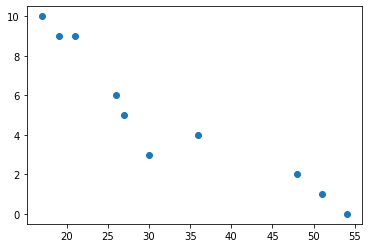

In [16]:
# Your code here.
plt.scatter(x=student_data.X, y=student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# Los datos muestran que al parecer la edad y el número de retardos está relacionada de manera negativa

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [35]:
# Your response here.
print(f"Covarianza entre el número de retardos y la edad: {np.cov(student_data.X, student_data.Y)[1][0]}")
print(f"Correlación entre el número de retardos y la edad: {np.corrcoef(student_data.X, student_data.Y)[0][1]}")
# Tanto la covariancia como la correlación muestran que existe una relación negativa entre el número 
# de retardos y la edad. La correlación muestra que dicha relación es fuerte ya que casi alcanza el -1.

Covarianza entre el número de retardos y la edad: -45.56666666666667
Correlación entre el número de retardos y la edad: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [58]:
# Your response here.
import statsmodels.api as sm
import seaborn as sns

X = sm.add_constant(student_data.X)
y = student_data.Y
model = sm.OLS(y, X).fit()

model.summary()
# El número de retardos es la variable de resultado. Voy a usar una regresión lineal de tipo OSL.

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           5.57e-05
Time:                        12:54:21   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

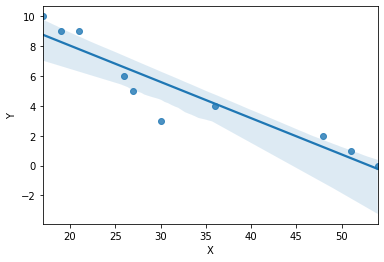

In [53]:
# Your code here.
sns.regplot(x="X", y="Y", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Dado que la R2 es de 0.882, la edad  explica alrededor del 90% de los motivos para llegar tarde,
# según nuestro modelo. El coeficiente muestra que por cada cambio en la edad 
# el número de retardos se ve afectado apenas en -0.2428 unidades.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [54]:
# Import any libraries you may need & the data
data = pd.read_csv("/Users/santiago/ih-bootcamp/labs/-lab-regression-analysis/vehicles.csv")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    35952 non-null  float64
 1   Make                     35952 non-null  object 
 2   Model                    35952 non-null  object 
 3   Year                     35952 non-null  int64  
 4   Engine Displacement      35952 non-null  float64
 5   Cylinders                35952 non-null  float64
 6   Transmission             35952 non-null  object 
 7   Drivetrain               35952 non-null  object 
 8   Vehicle Class            35952 non-null  object 
 9   Fuel Type                35952 non-null  object 
 10  Fuel Barrels/Year        35952 non-null  float64
 11  City MPG                 35952 non-null  int64  
 12  Highway MPG              35952 non-null  int64  
 13  Combined MPG             35952 non-null  int64  
 14  CO2 Emission Grams/Mil

In [ ]:
data.

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [72]:
# Your response here. 
data.corr()
# Al parecer la variable de barriles de combustible por año es la variable que explicará más las emisiones de CO2.
# El año es la variable que explica menos las emisiones de CO2.

,const,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,NaN,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,NaN,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,NaN,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,NaN,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,NaN,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,NaN,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,NaN,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,NaN,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [62]:
X = sm.add_constant(data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
y = data['CO2 Emission Grams/Mile']

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [64]:
# Your response here. 
model = sm.OLS(y, X).fit()
model.summary()
# Estoy utilizando un modelo de regresión lineal OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                             12:59:47   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Según el resultado del R2, las variables de nuestro modelo explican el 98% de la emisión de CO2. 
# Dado que el P F-statistic es de 0 las variables elegidas tienen un impacto real en la emisión de CO2.
# De las elegidas al parecer el número de barriles de combistible y el número de millas por galón son las variables
# qué explican mas los cambios en la emisión de CO2.

# Estos resultados son esperables ya que las variables elegidas que tienen un impacto más grande en la explicación del
# modelo (número de barriles de combistible y el número de millas por galón) están íntimamente relacionadas 
# con la emisión de CO2. El número de cylindros también muestra una relación positiva (esperable ya que a mayor número
# de cilindros, más combustible utilizado y mayor emisión de CO2. Al parecer conforme han pasado los años los
# carros se han hecho más eficientes en cuanto a la emisión de CO2.

# Los resultados tienen una relevancia estadística importante.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 